In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/final/wrangled/normalized.csv', index_col='year')
x_vars = [c for c in df.columns if c != 'instability']

Rationale for this section:
 - Some relationships are expected to be linear: instability vs. life expectancy for example. A good first step is to run a linear regression, to see how well the Y value is linearly explained by X. It also tells us which, if any, variables do not correspond to the assumption of linearity.
 - Some relationships are expected (hypothesized) to be non-linear: for example, immigration percentage or HSUS too low or high might both have negative effects of productivity and social stability. A random forest can see if a non-linear model fits the dataset better.
 - Neural network models are also non-linear, but they are more difficult to interpret. They are extremely versatile but usually requires larger datasets, so not sure if the 100 entry dataset can fit a neural network well. Regardless we'll see.

# Linear Regression

R²: 0.7710218065600047
MSE: 0.49494030039887144


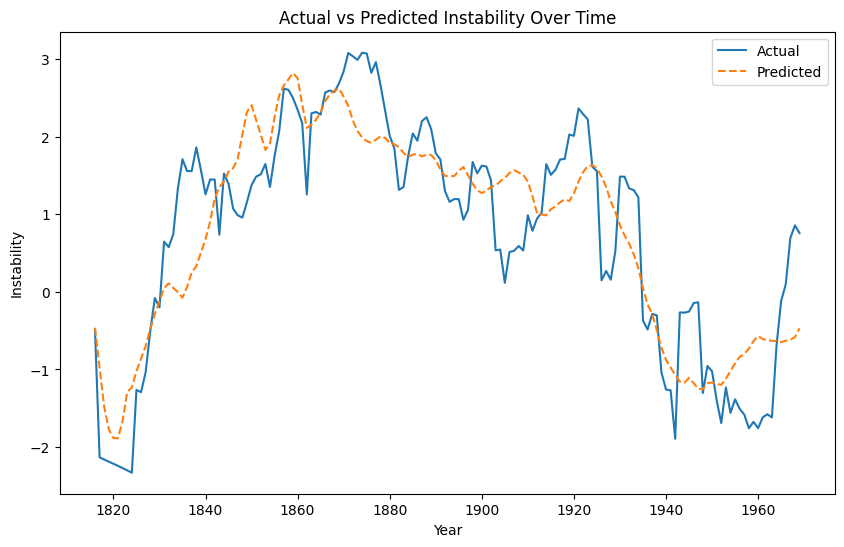

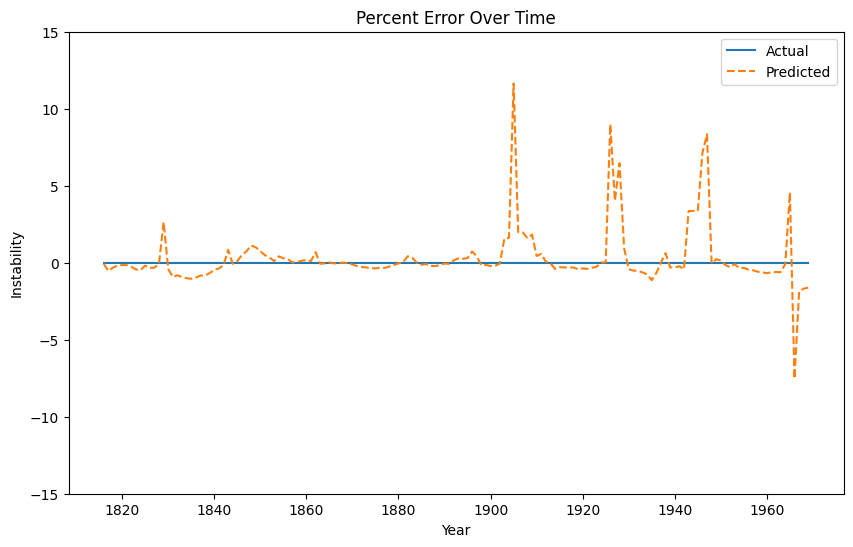

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the independent variables (X) and the dependent variable (y)
X = df[x_vars]
y = df['instability']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate R² and MSE
r_squared = model.score(X, y)
mse = mean_squared_error(y, y_pred)

print(f'R²: {r_squared}')
print(f'MSE: {mse}')
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Actual')
plt.plot(df.index, y_pred, label='Predicted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Instability')
plt.title('Actual vs Predicted Instability Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(df.index, y*0, label='Actual')
plt.plot(df.index, (y_pred-y)/y, label='Predicted', linestyle='--')
plt.ylim([-15,15])
plt.xlabel('Year')
plt.ylabel('Instability')
plt.title('Percent Error Over Time')
plt.legend()
plt.show()

# Random Forest

Neural Network Train R²: 0.9856274808118118
Neural Network Train MSE: 0.032470651984152936
Neural Network Test R²: 0.8383226740897223
Neural Network Test MSE: 0.28673296228639916


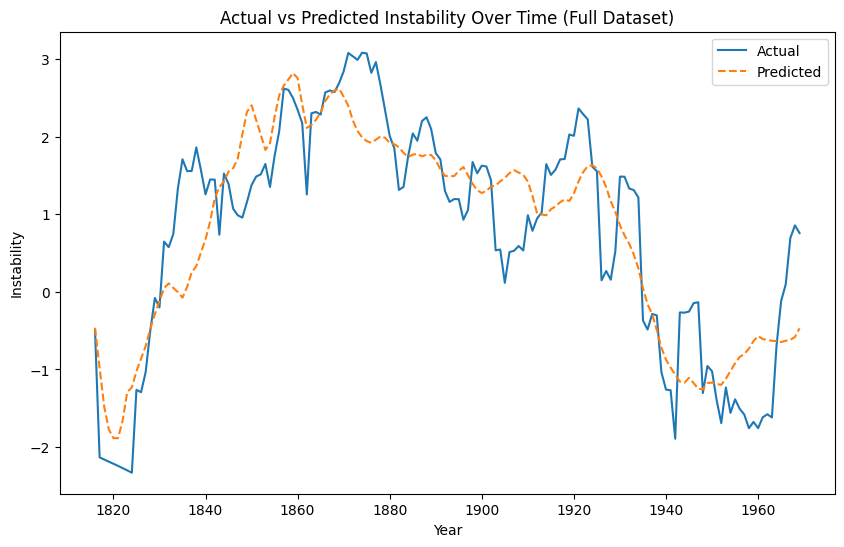

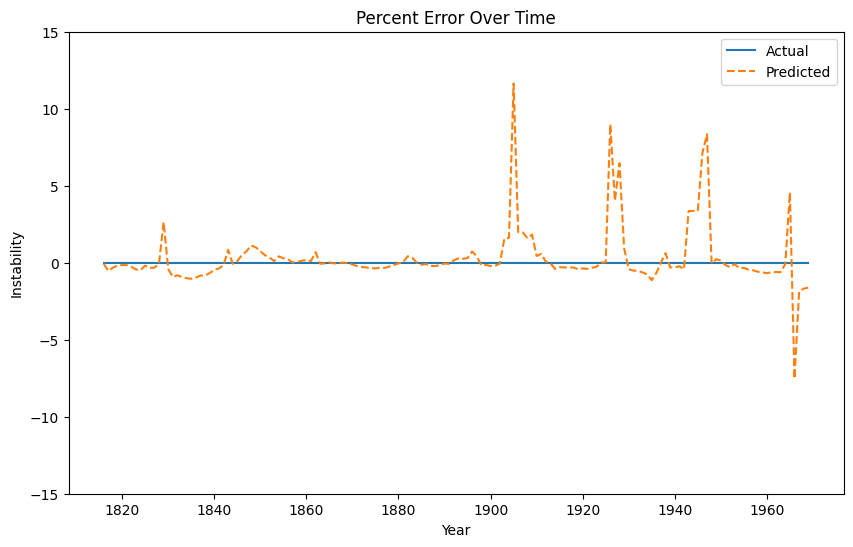

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the neural network model on the training set
nn_model = RandomForestRegressor(n_estimators=100, random_state=42)
nn_model.fit(X_train, y_train)

# Predict the values for the training set
y_train_pred = nn_model.predict(X_train)

# Predict the values for the test set
y_test_pred = nn_model.predict(X_test)

# Calculate R² and MSE for the training set
train_r_squared = nn_model.score(X_train, y_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R² and MSE for the test set
test_r_squared = nn_model.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Neural Network Train R²: {train_r_squared}')
print(f'Neural Network Train MSE: {train_mse}')
print(f'Neural Network Test R²: {test_r_squared}')
print(f'Neural Network Test MSE: {test_mse}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Actual')
plt.plot(df.index, y_pred, label='Predicted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Instability')
plt.title('Actual vs Predicted Instability Over Time (Full Dataset)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, y*0, label='Actual')
plt.plot(df.index, (y_pred-y)/y, label='Predicted', linestyle='--')
plt.ylim([-15,15])
plt.xlabel('Year')
plt.ylabel('Instability')
plt.title('Percent Error Over Time')
plt.legend()
plt.show()

              Feature  Importance
3        polarization    0.693356
7                 age    0.075380
8         height_diff    0.030656
1              height    0.024545
12   immigration_diff    0.024383
5        wagegdpratio    0.022128
0         immigration    0.018389
11       evi_log_diff    0.016771
6                hsus    0.015554
13    population_diff    0.013916
4          population    0.013713
2             evi_log    0.012287
15          hsus_diff    0.012201
9            age_diff    0.010274
14  wagegdpratio_diff    0.009252
10  polarization_diff    0.007195


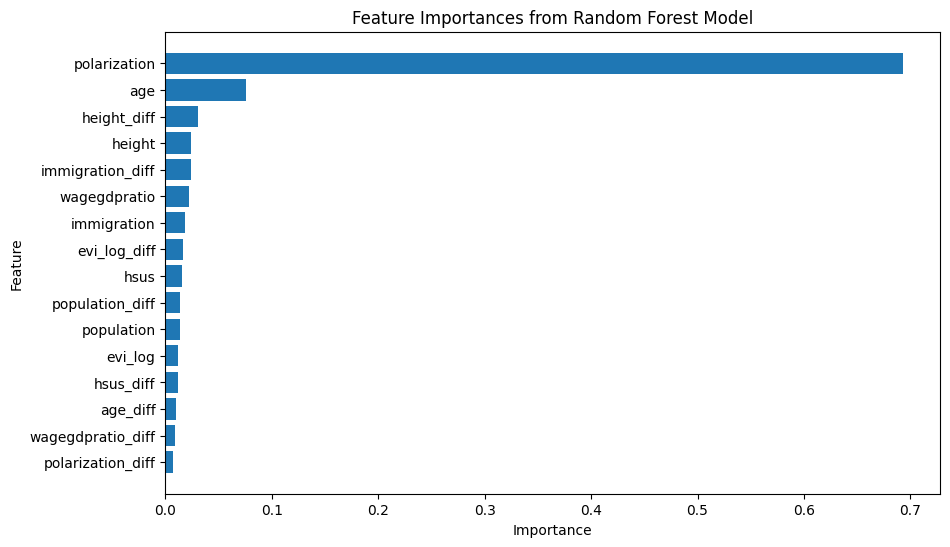

In [246]:
# Get feature importances from the trained Random Forest model
importances = nn_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': x_vars, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Neural Network

Neural Network Train R²: 0.9703050055184359
Neural Network Train MSE: 0.06708746176346299
Neural Network Test R²: 0.9119234271858827
Neural Network Test MSE: 0.15620283480591748
Full Dataset R²: 0.9606636157402695
Full Dataset MSE: 0.08502627062265836


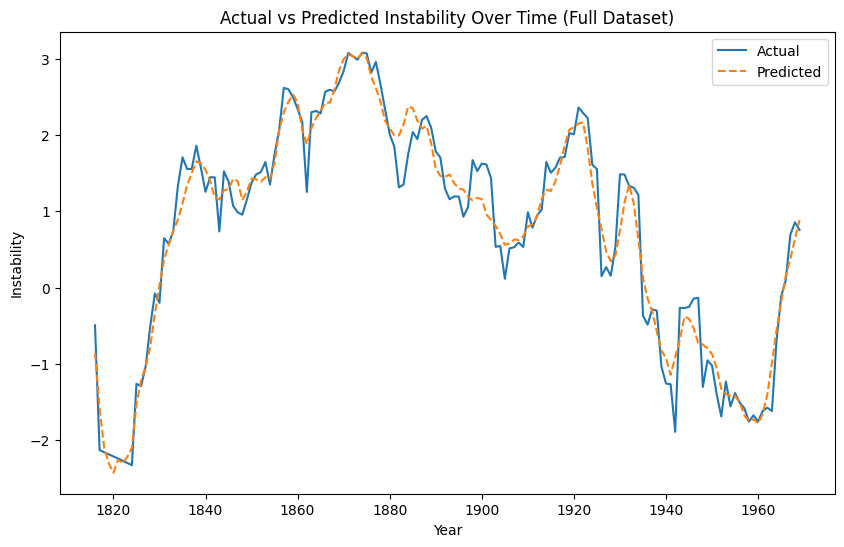

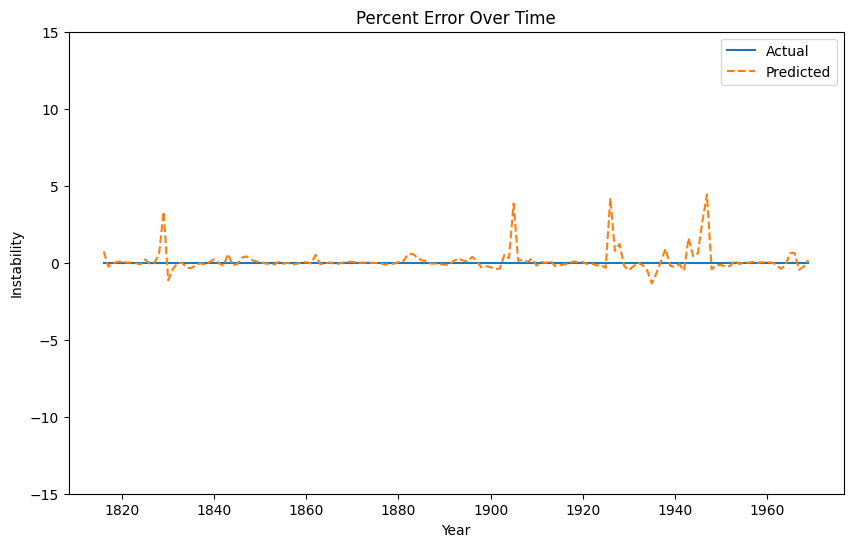

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

c = [c for c in df.columns if c != 'instability' and c[-5:] != '_diff'] 
X = df[c]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the neural network model on the training set
nn_model = MLPRegressor(hidden_layer_sizes=(32,32,32), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Predict the values for the training set
y_train_pred = nn_model.predict(X_train)

# Predict the values for the test set
y_test_pred = nn_model.predict(X_test)

# Calculate R² and MSE for the training set
train_r_squared = nn_model.score(X_train, y_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R² and MSE for the test set
test_r_squared = nn_model.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Neural Network Train R²: {train_r_squared}')
print(f'Neural Network Train MSE: {train_mse}')
print(f'Neural Network Test R²: {test_r_squared}')
print(f'Neural Network Test MSE: {test_mse}')

from sklearn.metrics import r2_score, mean_squared_error

y_pred = nn_model.predict(X)

# Calculate R² and MSE for the entire dataset
r_squared_full = r2_score(y, y_pred)
mse_full = mean_squared_error(y, y_pred)

print(f'Full Dataset R²: {r_squared_full}')
print(f'Full Dataset MSE: {mse_full}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Actual')
plt.plot(df.index, y_pred, label='Predicted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Instability')
plt.title('Actual vs Predicted Instability Over Time (Full Dataset)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, y*0, label='Actual')
plt.plot(df.index, (y_pred-y)/y, label='Predicted', linestyle='--')
plt.ylim([-15,15])
plt.xlabel('Year')
plt.ylabel('Instability')
plt.title('Percent Error Over Time')
plt.legend()
plt.show()

A few notes:
linear regression works better with the generated variables but other two models work worse. Generated variables adds unlinearity to linear regression but the other two models can handle non-linearity well, while generated variables add noise and inflate the parameter space and overfits the model.

Also the model seems to consistently have large errors around 1835, 1910, 1925, and 1945. 1835 and 1925 are two US economic crises, 1910 and 1945 correspond to the two world wars. Understandable.

An idea for further investigation is to delete these unusual years and see if the model improves. This partially answers the overfitting question: is the model really learning a historical trend, or is it just remembering US history? Abnormalities during the unusual years suggest that the answer might be the former.